# K Nearest Neighbors

## Loading data



In [1]:
install.packages('ISLR',repos = 'http://cran.us.r-project.org')


Installing package into 'C:/Users/jihad/Documents/R/win-library/4.1'
(as 'lib' is unspecified)



package 'ISLR' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\jihad\AppData\Local\Temp\RtmpuqG2No\downloaded_packages


In [2]:
library(ISLR)
library(ggplot2)

In [3]:
str(Caravan)

'data.frame':	5822 obs. of  86 variables:
 $ MOSTYPE : num  33 37 37 9 40 23 39 33 33 11 ...
 $ MAANTHUI: num  1 1 1 1 1 1 2 1 1 2 ...
 $ MGEMOMV : num  3 2 2 3 4 2 3 2 2 3 ...
 $ MGEMLEEF: num  2 2 2 3 2 1 2 3 4 3 ...
 $ MOSHOOFD: num  8 8 8 3 10 5 9 8 8 3 ...
 $ MGODRK  : num  0 1 0 2 1 0 2 0 0 3 ...
 $ MGODPR  : num  5 4 4 3 4 5 2 7 1 5 ...
 $ MGODOV  : num  1 1 2 2 1 0 0 0 3 0 ...
 $ MGODGE  : num  3 4 4 4 4 5 5 2 6 2 ...
 $ MRELGE  : num  7 6 3 5 7 0 7 7 6 7 ...
 $ MRELSA  : num  0 2 2 2 1 6 2 2 0 0 ...
 $ MRELOV  : num  2 2 4 2 2 3 0 0 3 2 ...
 $ MFALLEEN: num  1 0 4 2 2 3 0 0 3 2 ...
 $ MFGEKIND: num  2 4 4 3 4 5 3 5 3 2 ...
 $ MFWEKIND: num  6 5 2 4 4 2 6 4 3 6 ...
 $ MOPLHOOG: num  1 0 0 3 5 0 0 0 0 0 ...
 $ MOPLMIDD: num  2 5 5 4 4 5 4 3 1 4 ...
 $ MOPLLAAG: num  7 4 4 2 0 4 5 6 8 5 ...
 $ MBERHOOG: num  1 0 0 4 0 2 0 2 1 2 ...
 $ MBERZELF: num  0 0 0 0 5 0 0 0 1 0 ...
 $ MBERBOER: num  1 0 0 0 4 0 0 0 0 0 ...
 $ MBERMIDD: num  2 5 7 3 0 4 4 2 1 3 ...
 $ MBERARBG: num  5 0 0 

In [4]:
summary(Caravan$Purchase)

No  Yes 
5474  348


# Cleaning Data

In [5]:
# We drop any NA values by dropping the rows

In [6]:
any(is.na(Caravan))

[1] FALSE

## Standardizing Variables


Because KNN classifcation predicts classes using distance metrics between observations,the scale of the observations matters greatly. A large scale variable has a much larger effect on distances. It is easier to understand for this method why we center and scale


In [7]:
var(Caravan[,1])

[1] 165.0378

In [8]:
var(Caravan[,2])

[1] 0.1647078

In [9]:
# Note the large scale difference in variances above.
# We standarize all input variabless except the response (Purchase)
# and we seperate input and reponse vectors

purchase <- Caravan[,86]

In [10]:
# Standarize the dataset using scale()
# All columns except the 86th (purchase)
standardized.Caravan <- scale(Caravan[,-86])

In [11]:
var(standardized.Caravan[,1])

[1] 1

In [12]:
# So all the independent variables are centered and have unit standard deviation.
# Now we split our dataset in train and test sets


In [13]:
# Say first 1000 rows for the test set
test.index <- 1:1000
test.data <- standardized.Caravan[test.index,]
test.purchase <- purchase[test.index]

In [14]:
dim(test.data) 

[1] 1000   85

In [15]:
# Rest of data for training
train.data <- standardized.Caravan[-test.index,]
train.purchase <- purchase[-test.index]

In [16]:
dim(train.data)
# Original dataset had 5822 rows (observations), 
# we've taken the first 1000 for test, so 4822 rows left



[1] 4822   85

## KNN

Our goal is to develop a model to predict whether an individual will purchase an insurance plan or not. The knn() function arguments we focus on are the training data frame, testing data frame, response column (purchase), and k, how many neighbors.

In [17]:
library(class)

In [18]:
set.seed(101)
predicted.purchase <- knn(train.data, test.data, train.purchase, k=1)
head(predicted.purchase)

[1] No No No No No No
Levels: No Yes

Evaluate the model we trained to see our misclassification error rate

In [19]:
mean(test.purchase != predicted.purchase)

[1] 0.116

## Choosing The Number of Neighbors (K)


In [20]:
predicted.purchase <- knn(train.data, test.data, train.purchase, k=3)
mean(test.purchase != predicted.purchase)

[1] 0.073

With 2 extra neighbors our error rate dropped by 37%. Lets use K=5.

In [21]:
predicted.purchase <- knn(train.data, test.data, train.purchase, k=5)
mean(test.purchase != predicted.purchase)

[1] 0.066

Using for loop to find a good K value:

In [22]:
predicted.purchase = NULL
error.rate = NULL

for (i in 1:20) {
    set.seed(101)
    predicted.purchase = knn(train.data,test.data,train.purchase,k=i)
    error.rate[i] = mean(test.purchase != predicted.purchase)
}


In [23]:
print(error.rate)

 [1] 0.116 0.107 0.074 0.070 0.066 0.064 0.062 0.061 0.058 0.058 0.059 0.058
[13] 0.059 0.059 0.059 0.059 0.059 0.059 0.059 0.059


#### After a certain number of neighbors (K=9) our misclassification rate does not improve anymore.

### Elbow Method

In [24]:
K.value <- 1:20

In [25]:
error.df <- data.frame(error.rate,K.value)

In [26]:
error.df

error.rate,K.value
<dbl>,<int>
0.116,1
0.107,2
0.074,3
0.070,4
0.066,5
0.064,6
0.062,7
0.061,8
0.058,9


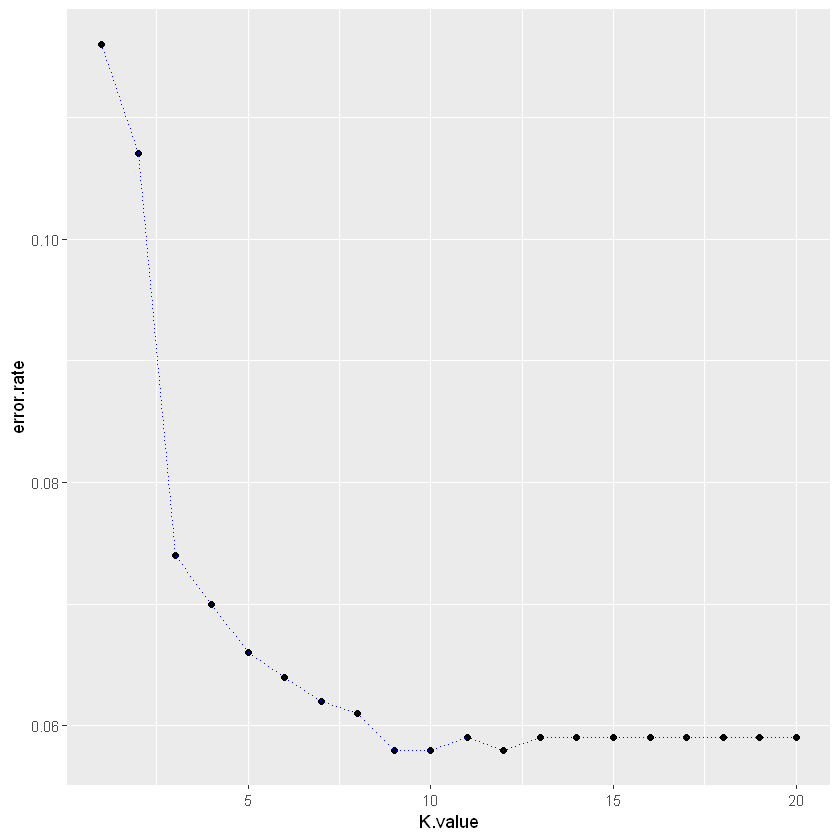

In [30]:
ggplot(error.df, aes(x=K.value, y=error.rate)) +geom_point() +
geom_line(lty="dotted", color="blue")